In [194]:
from typing import List

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pathlib import Path
res_roberta_train_df = pd.read_json("./results/predictions-train-transformers-roberta-roberta-base-batch-32-epochs-1-learn-2e-05-warmup-0.06.json").head(n=10)
res_roberta_dev_df = pd.read_json("./results/predictions-dev-transformers-roberta-roberta-base-batch-32-epochs-1-learn-2e-05-warmup-0.06.json")
#res_robert_test_df = pd.read_json("./results/predictions-test-transformers-roberta-roberta-base-batch-32-epochs-1-learn-2e-05-warmup-0.06.json")

labels_train_df = pd.read_csv("./../data/labels_train.csv")
arg_train_df = pd.read_csv("./../data/arguments_train.csv")
kp_train_df = pd.read_csv("./../data/key_points_train.csv")

labels_dev_df = pd.read_csv("./../data/labels_dev.csv")
arg_dev_df = pd.read_csv("./../data/arguments_dev.csv")
kp_dev_df = pd.read_csv("./../data/key_points_dev.csv")

In [195]:
def load_predictions(predictions_file: Path) -> pd.DataFrame:
    """
    Load data frame with argument key point matches and scores.
    """
    args: List[str] = []
    kps: List[str] = []
    scores: List[float] = []
    with predictions_file.open("r") as file_in:
        predictions = json.load(file_in)
    for arg_id, kp_scores in predictions.items():
        for kp_id, score in kp_scores.items():
            args.append(arg_id)
            kps.append(kp_id)
            scores.append(score)
    print(f"Loaded {len(args)} predictions "
          f"for {len(predictions.items())} arguments.")
    return pd.DataFrame({
        "arg_id": args,
        "key_point_id": kps,
        "score": scores
    })

# Load Data

In [196]:
pred_roberta_train_df = load_predictions(Path('./results/predictions-train-transformers-roberta-roberta-base-batch-32-epochs-1-learn-2e-05-warmup-0.06.json'))
pred_roberta_dev_df = load_predictions(Path('./results/predictions-dev-transformers-roberta-roberta-base-batch-32-epochs-1-learn-2e-05-warmup-0.06.json'))
#pred_roberta_test_df = load_predictions(Path('./results/predictions-test-transformers-roberta-roberta-base-batch-32-epochs-1-learn-2e-05-warmup-0.06.json'))

pred_bert_train_df = load_predictions(Path('./results/predictions-train-transformers-bert-bert-base-uncased-batch-32-epochs-1-learn-2e-05-warmup-0.06.json'))
pred_bert_dev_df = load_predictions(Path('./results/predictions-dev-transformers-bert-bert-base-uncased-batch-32-epochs-1-learn-2e-05-warmup-0.06.json'))
#pred_bert_test_df = load_predictions(Path('./results/predictions-test-transformers-bert-bert-base-uncased-batch-32-epochs-1-learn-2e-05-warmup-0.06.json'))

Loaded 24454 predictions for 5583 arguments.
Loaded 4211 predictions for 932 arguments.
Loaded 24454 predictions for 5583 arguments.
Loaded 4211 predictions for 932 arguments.


# Prepare RoBERTa Data

In [197]:
roberta_train_df = labels_train_df.merge(arg_train_df, on='arg_id').merge(kp_train_df, on='key_point_id')
roberta_dev_df = labels_dev_df.merge(arg_dev_df, on='arg_id').merge(kp_dev_df, on='key_point_id')
#roberta_test_df = labels_test_df.merge(arg_train_df, on='arg_id').merge(kp_train_df, on='key_point_id')

roberta_train_df = roberta_train_df[['arg_id','argument','key_point_id','key_point','label']].merge(pred_roberta_train_df, on=['arg_id','key_point_id'])
roberta_dev_df = roberta_dev_df[['arg_id','argument','key_point_id','key_point','label']].merge(pred_roberta_dev_df, on=['arg_id','key_point_id'])
#roberta_test_df = roberta_test_df[['arg_id','argument','key_point_id','key_point','label']].merge(pred_roberta_test_df, on=['arg_id','key_point_id'])

roberta_train_df.set_index(['key_point_id','arg_id'], inplace=True)
roberta_dev_df.set_index(['key_point_id','arg_id'], inplace=True)
#roberta_test_df.set_index(['key_point_id','arg_id'], inplace=True)


In [198]:
# roberta_train_df

In [199]:
# roberta_dev_df

# RoBERTa Predictions with Label 1

In [200]:
pd.set_option('display.max_colwidth', None)

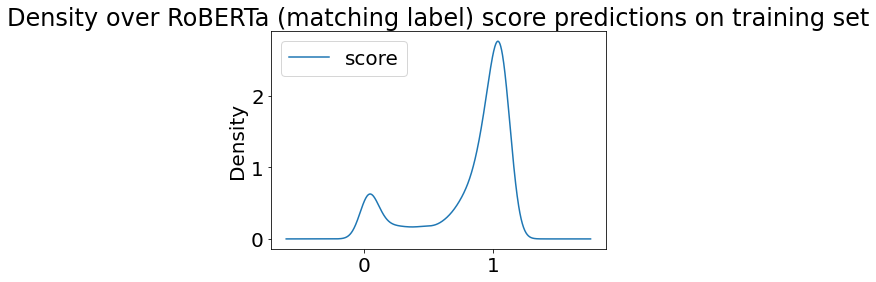

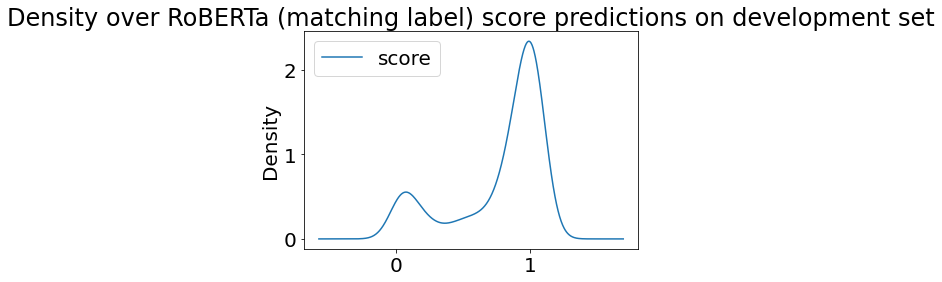

In [201]:
roberta_train_match_label_df = roberta_train_df[roberta_train_df.label == 1].drop(["label"],axis=1)
roberta_dev_match_label_df = roberta_dev_df[roberta_dev_df.label == 1].drop(["label"],axis=1)
#roberta_test_match_label_df = roberta_test_df[roberta_test_df.label == 1].drop(["label"],axis=1)

roberta_train_match_label_df.plot(kind="density")
plt.title('Density over RoBERTa (matching label) score predictions on training set')
plt.savefig('./img/roberta_train_match_label_df')
roberta_dev_match_label_df.plot(kind="density")
plt.title('Density over RoBERTa (matching label) score predictions on development set')
plt.savefig('./img/roberta_dev_match_label_df')

In [202]:
roberta_train_match_label_df[roberta_train_match_label_df.score < 0.6]

argument  \
key_point_id arg_id                                                                                                                                                                                                                          
kp_0_4       arg_0_147  assisted suicide is killing by another name - it is far too open to abuse by those with a vested interest, since it is often impossible to accurately interpret the intentions of the individual being 'assisted'.   
             arg_0_160                                                   assisted suicide is too dangerous as if someone is weak and feeble a manipulative person could encourage them to kill themselves when they do not really want to.   
             arg_0_161                                                            assisted suicide is unethical how do we know that the person who is assisting the suicide hasnt got something to gain from the death of the other person   
             arg_0_162                                                                                   Assisted suicide should be a crime to prevent greedy individuals from killing their family member to get their money and property   
             arg_0_171                                                                         assisted suicide should be a criminal offence because it would be very easy to murder a vulnerable relative in order to get an inheritance.   
...                                                                                                                                                                                                                                    ...   
kp_27_1      arg_27_89                                                                                                                   we shouldn't subsidize vocational education because these types of careers are usually low paying   
kp_27_2      arg_27_31         the city, state, and/or federal government not only have higher priorities in other areas, but there is also debt/budget deficit to consider. in other words, we may not be able to afford another program.   
             arg_27_46                                                                              vocational education funds would be better used in higher education which is more important as the workplace becomes more computerized   
             arg_27_85                                                                We should subsidize not vocational education because it trades off with more urgent needs the state can meet, like homeless shelters and food banks.   
             arg_27_90                  we shouldn't subsidize vocational education. most companies provide training to employees and this is their duty. the government has lots of more important things to subsidize like medical care.   

                                                                                            key_point  \
key_point_id arg_id                                                                                     
kp_0_4       arg_0_147  Assisted suicide allows people to solicit someone to die to their own benefit   
             arg_0_160  Assisted suicide allows people to solicit someone to die to their own benefit   
             arg_0_161  Assisted suicide allows people to solicit someone to die to their own benefit   
             arg_0_162  Assisted suicide allows people to solicit someone to die to their own benefit   
             arg_0_171  Assisted suicide allows people to solicit someone to die to their own benefit   
...                                                                                               ...   
kp_27_1      arg_27_89                               vocational education is not a good career choice   
kp_27_2      arg_27_31         subsidizing vocational education diverts money from more worthy causes   
             arg_27_46         subsidizing vocational education diverts money fro

In [203]:
# arg_0_147 passt zu kp 0_4 und 0_5
roberta_train_match_label_df.query('arg_id == "arg_0_147"')

,,argument,key_point,score
key_point_id,arg_id,,,
kp_0_4,arg_0_147,"assisted suicide is killing by another name - it is far too open to abuse by those with a vested interest, since it is often impossible to accurately interpret the intentions of the individual being 'assisted'.",Assisted suicide allows people to solicit someone to die to their own benefit,0.014587
kp_0_5,arg_0_147,"assisted suicide is killing by another name - it is far too open to abuse by those with a vested interest, since it is often impossible to accurately interpret the intentions of the individual being 'assisted'.",Assisted suicide is akin to killing someone,0.514648


# RoBERTa Predictions with Label 0

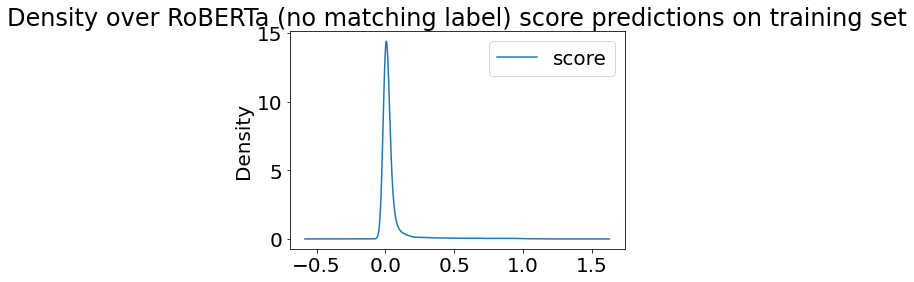

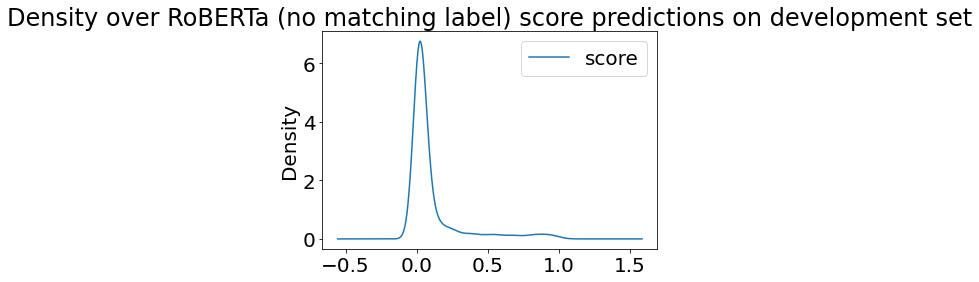

In [204]:
roberta_train_no_match_label_df = roberta_train_df[roberta_train_df.label == 0].drop(["label"],axis=1)
roberta_dev_no_match_label_df = roberta_dev_df[roberta_dev_df.label == 0].drop(["label"],axis=1)
#roberta_test_match_label_df = roberta_test_df[roberta_test_df.label == 0].drop(["label"],axis=1)

roberta_train_no_match_label_df.plot(kind="density")
plt.title('Density over RoBERTa (no matching label) score predictions on training set')
plt.savefig('./img/roberta_train_no_match_label_df')
roberta_dev_no_match_label_df.plot(kind="density")
plt.title('Density over RoBERTa (no matching label) score predictions on development set')
plt.savefig('./img/roberta_dev_no_match_label_df')

In [205]:

roberta_train_no_match_label_df[roberta_train_no_match_label_df.score > 0.7]

argument  \
key_point_id arg_id                                                                                                                                                                                                                    
kp_0_8       arg_0_242                                                                                                                      this is effectively commiting murder; no one has the right to take another person's life   
kp_0_1       arg_0_52                                                                                 assisted suicide shouldn't be a criminal offence if they are suffering from an incurable disease, they are going to die anyway   
             arg_0_70                                                                                                                                              if people has a life ending illness they should be allowed to die   
             arg_0_89                                                                                                   People should be able to ask for help in ending their own life if they are living with an incurable disease.   
kp_0_2       arg_0_11    assisted suicide allows terminally ill persons to choose when to die and do it with dignity. it lets people decide not to live in a state of pain and misery and choose to pass on with human intervention.   
...                                                                                                                                                                                                                              ...   
kp_27_7      arg_27_180                                                                                             vocational education should be subsidized as the majority of those studying would be from lower income families.   
             arg_27_222                                                                                                                              yes, we should subsidize vocational education because is import for yong people   
kp_27_3      arg_27_9                                                            it is unfair to only subsidize vocational education. achieving a more advanced education is very expensive and it would also need to be subsidized.   
             arg_27_51                                                                                                   Vocational education is not as expensive as pursuing an academic degree and does not need to be subsidized.   
             arg_27_69                                                                                                   we don't need to subsidize vocational education because the cost is already lower than traditional college.   

                                                                                key_point  \
key_point_id arg_id                                                                         
kp_0_8       arg_0_242              People do not have the right to self-harm/harm others   
kp_0_1       arg_0_52                                  Assisted suicide reduces suffering   
             arg_0_70                                  Assisted suicide reduces suffering   
             arg_0_89                                  Assisted suicide reduces suffering   
kp_0_2       arg_0_11          People should have the freedom to choose to end their life   
...                                                                                   ...   
kp_27_7      arg_27_180  vocational education is beneficial for the entire market/society   
             arg_27_222  vocational education is beneficial for the entire market/society   
kp_27_3      arg_27_9                       subsidizing vocational education is expensive   
             arg_27_51                      subsidizing vocational education is expensive   
             arg_27_69                      subsidizing vocational education is expensi

# Prepare BERT Data


In [206]:
bert_train_df = labels_train_df.merge(arg_train_df, on='arg_id').merge(kp_train_df, on='key_point_id')
bert_dev_df = labels_dev_df.merge(arg_dev_df, on='arg_id').merge(kp_dev_df, on='key_point_id')

bert_train_df = bert_train_df[['arg_id','argument','key_point_id','key_point','label']].merge(pred_bert_train_df, on=['arg_id','key_point_id'])
bert_dev_df = bert_dev_df[['arg_id','argument','key_point_id','key_point','label']].merge(pred_bert_dev_df, on=['arg_id','key_point_id'])

bert_train_df.set_index(['key_point_id','arg_id'], inplace=True)
bert_dev_df.set_index(['key_point_id','arg_id'], inplace=True)

# BERT Predictions with Label 1

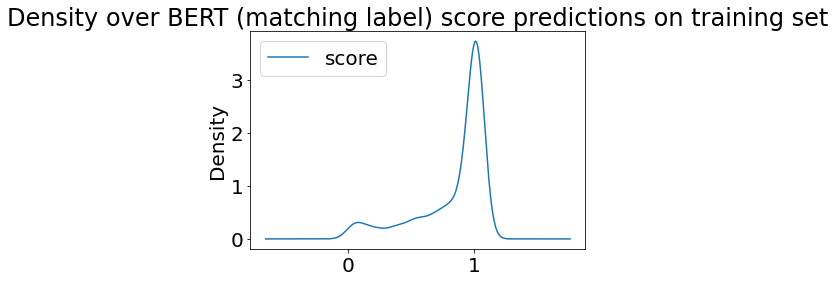

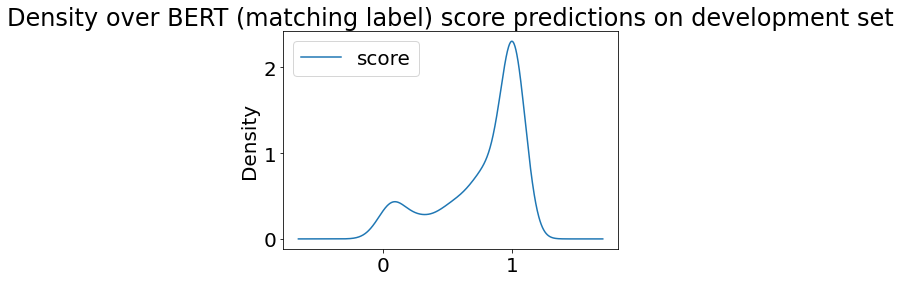

In [207]:
bert_train_match_label_df = bert_train_df[bert_train_df.label == 1].drop(["label"],axis=1)
bert_dev_match_label_df = bert_dev_df[bert_dev_df.label == 1].drop(["label"],axis=1)
#roberta_test_match_label_df = roberta_test_df[roberta_test_df.label == 1].drop(["label"],axis=1)

bert_train_match_label_df.plot(kind="density")
plt.title('Density over BERT (matching label) score predictions on training set')
plt.savefig('./img/bert_train_match_label_df')
bert_dev_match_label_df.plot(kind="density")
plt.title('Density over BERT (matching label) score predictions on development set')
plt.savefig('./img/bert_dev_match_label_df')

# BERT Predictions with Label 0

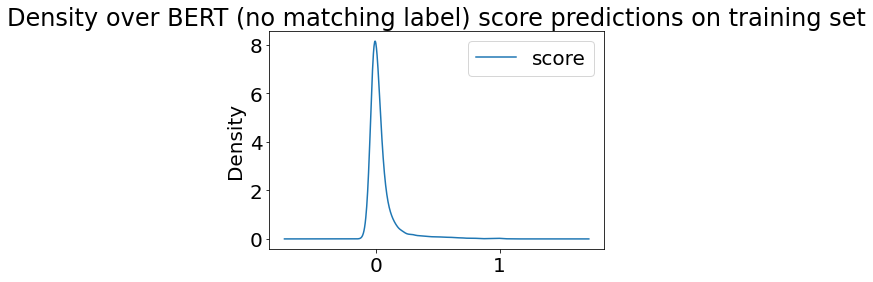

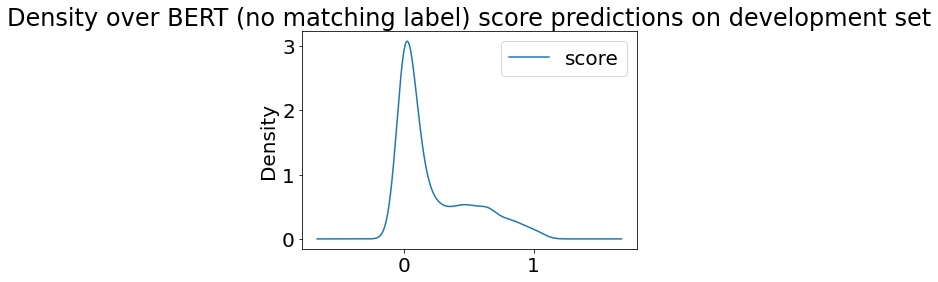

In [208]:
bert_train_no_match_label_df = bert_train_df[bert_train_df.label == 0].drop(["label"],axis=1)
bert_dev_no_match_label_df = bert_dev_df[bert_dev_df.label == 0].drop(["label"],axis=1)
#roberta_test_match_label_df = roberta_test_df[roberta_test_df.label == 0].drop(["label"],axis=1)

bert_train_no_match_label_df.plot(kind="density")
plt.title('Density over BERT (no matching label) score predictions on training set')
plt.savefig('./img/bert_train_no_match_label_df')
bert_dev_no_match_label_df.plot(kind="density")
plt.title('Density over BERT (no matching label) score predictions on development set')
plt.savefig('./img/bert_dev_no_match_label_df')

In [209]:
df_false = roberta_dev_match_label_df[(roberta_dev_match_label_df.score < 0.5) ]
df_true = roberta_dev_match_label_df[(roberta_dev_match_label_df.score > 0.5) ]
#bert_dev_match_label_df.query('arg_id == "arg_4_178"')

df_false['arg_length'] = df_false['argument'].str.len()
df_false['kp_length'] = df_false['key_point'].str.len()
df_false['diff'] = df_false['arg_length'] - df_false['kp_length']

df_true['arg_length'] = df_true['argument'].str.len()
df_true['kp_length'] = df_true['key_point'].str.len()
df_true['diff'] = df_true['arg_length'] - df_true['kp_length']


print(str(df_false['diff'].mean()) + " vs. " + str(df_true['diff'].mean()))






70.08783783783784 vs. 67.93389830508474


<ipython-input-209-804d02cbc993>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false['arg_length'] = df_false['argument'].str.len()
<ipython-input-209-804d02cbc993>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false['kp_length'] = df_false['key_point'].str.len()
<ipython-input-209-804d02cbc993>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

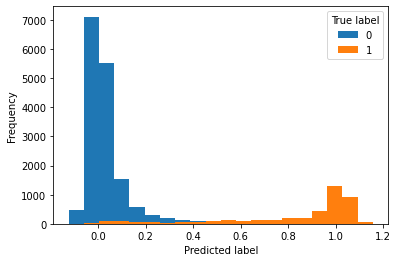

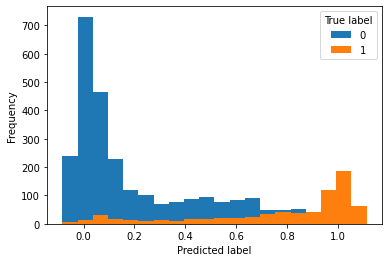

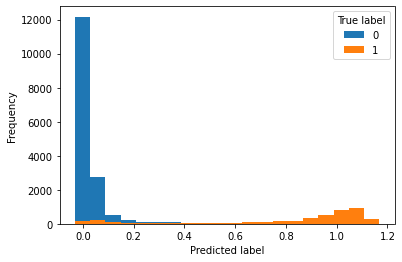

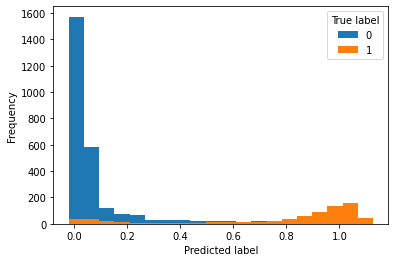

In [218]:
plt.rc('font', size=10)

bert_train_df.reset_index().pivot(columns='label', values='score').plot.hist(bins=20)
#plt.title('Density over BERT score predictions on training set')
plt.xlabel("Predicted label")
plt.legend(title="True label")
plt.savefig('./img/bert_train_df')
plt.savefig('../paper/figures/histogram-labels-bert-train.pdf')
bert_dev_df.reset_index().pivot(columns='label', values='score').plot.hist(bins=20)
#plt.title('Density over BERT score predictions on development set')
plt.xlabel("Predicted label")
plt.legend(title="True label")
plt.savefig('./img/bert_dev_df')
plt.savefig('../paper/figures/histogram-labels-bert-dev.pdf')

roberta_train_df.reset_index().pivot(columns='label', values='score').plot.hist(bins=20)
#plt.title('Density over RoBERTa score predictions on training set')
plt.xlabel("Predicted label")
plt.legend(title="True label")
plt.savefig('./img/roberta_train_df')
plt.savefig('../paper/figures/histogram-labels-roberta-train.pdf')
roberta_dev_df.reset_index().pivot(columns='label', values='score').plot.hist(bins=20)
#plt.title('Density over RoBERTa score predictions on development set')
plt.xlabel("Predicted label")
plt.legend(title="True label")
plt.savefig('./img/roberta_dev_df')
plt.savefig('../paper/figures/histogram-labels-roberta-dev.pdf')

<AxesSubplot:xlabel='score', ylabel='kp_arg_diff'>

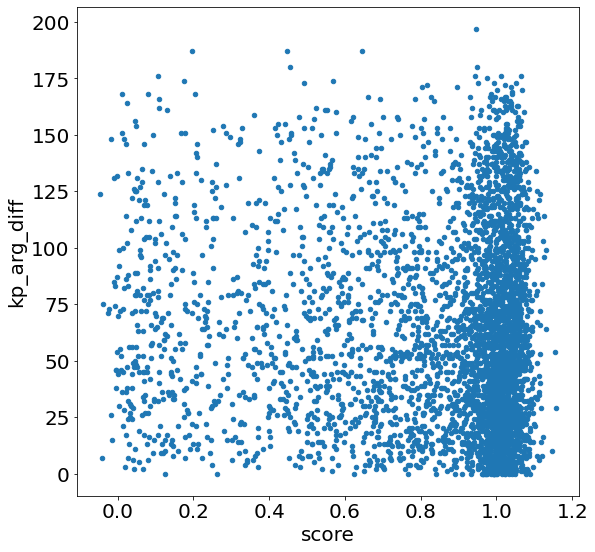

In [211]:
test_df = bert_train_match_label_df
#test_df['score_diff'] = 1 - test_df['score'] 

test_df['arg_length'] = test_df['argument'].str.len()
test_df['kp_length'] = test_df['key_point'].str.len()
test_df['kp_arg_diff'] = abs(test_df['kp_length'] - test_df['arg_length'])

test_df.sort_values(by='kp_arg_diff', ascending=True).plot(x = 'score', y='kp_arg_diff',figsize=(9,9), kind='scatter')
#test_df.sort_values(by='score', ascending=True)

<ipython-input-217-a12521591c48>:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,test2_df["score_diff"].max())


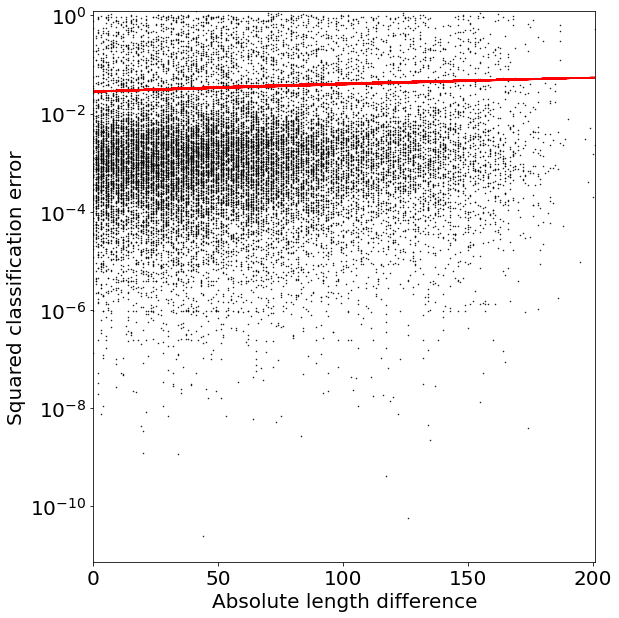

In [217]:
plt.rc('font', size=20)

test2_df = bert_train_df
# test2_df = bert_dev_df
# test2_df = test2_df[test2_df['label'] == 0]
test2_df['score_diff'] = (test2_df['label'] - test2_df['score'])**2

test2_df['arg_length'] = test2_df['argument'].str.len()
test2_df['kp_length'] = test2_df['key_point'].str.len()
test2_df['kp_arg_diff'] = abs(test2_df['kp_length'] - test2_df['arg_length'])

test2_df.plot(x='kp_arg_diff',y = 'score_diff', figsize=(9,9), kind='scatter',marker=".",s=1,c="black")
plt.xlabel("Absolute length difference",fontsize = 20)
plt.ylabel("Squared classification error",fontsize = 20)
# plt.xscale("log")
plt.yscale("log")

z = np.polyfit(test2_df["kp_arg_diff"], test2_df["score_diff"], 1)
p = np.poly1d(z)
plt.plot(test2_df["kp_arg_diff"],p(test2_df["kp_arg_diff"]),"r-")
plt.xlim(test2_df["kp_arg_diff"].min(),test2_df["kp_arg_diff"].max())
plt.ylim(0,test2_df["score_diff"].max())

plt.tight_layout()
plt.savefig('../paper/figures/classification-error-length-difference-bert-train.pdf')